#Task 2

In [1]:
# Install SWIG, a tool used to connect C/C++ code with Python. It's often used in RL environments to enable efficient communication between Python and low-level implementations of algorithms
!pip install -q swig

# Install the gym library with the box2d environment, used for 2D physics-based simulation tasks
!pip install -q gym[box2d]

# Install stable-baselines3 with extra dependencies (needed for various environments and features in the library), a set of RL algorithms implemented in PyTorch
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_

In [2]:
# Import the gymnasium library as gym, which provides various environments for developing and testing RL algorithms
import gymnasium as gym
import numpy as np

In [3]:
# Import PPO (Proximal Policy Optimization) algorithm from stable-baselines3. PPO is a policy-gradient method
from stable_baselines3 import PPO

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Import the MlpPolicy (Multi-Layer Perceptron) policy class. MlpPolicy is a policy class that uses MLP for function approximation
from stable_baselines3.dqn import MlpPolicy

# Import make_vec_env utility function to create vectorized environments for parallel execution of multiple environment instances. This can speed up training by allowing multiple agents to interact with their environments simultaneously
from stable_baselines3.common.env_util import make_vec_env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Parallel Environments: make_vec_env is used to create multiple instances of the environment to be run in parallel. This allows the agent to collect more experience in less time, leading to faster training
vec_env = make_vec_env(
    "LunarLander-v2",          # The name of the environment to create (LunarLander-v2 in this case, from OpenAI's Gym)
    n_envs=4,                  # Number of parallel environments to create
    wrapper_class=gym.wrappers.TimeLimit,  # The wrapper class (TimeLimit wrapper) will be applied to each environment. This wrapper is used to set a maximum number of steps per episode
    wrapper_kwargs={"max_episode_steps": 500}  # Keyword (additional) arguments for the wrapper (limit episodes to 500 steps). This prevents episodes from running indefinitely and ensures consistency in episode length
)

In [6]:
from stable_baselines3.common.callbacks import BaseCallback

# Create a custom callback class that will log the rewards at each episode
class RewardCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardCallback, self).__init__(verbose)
        self.rewards = []
        self.episode_rewards = []

    def _on_step(self) -> bool:
        # Collect rewards at each step
        reward = self.locals['rewards'][0]
        self.episode_rewards.append(reward)

        if self.locals['dones'][0]:  # Check if an episode is done
            episode_reward = sum(self.episode_rewards)
            self.rewards.append(episode_reward)
            self.episode_rewards = []  # Reset episode rewards for the next episode
            print(f"Episode: {len(self.rewards)}, Reward: {episode_reward}")

        return True

In [7]:
# Create the PPO model with the MLP policy. PPO is a RL algorithm known for its stability and efficiency
model = PPO("MlpPolicy", vec_env, verbose=1) # Initialize the PPO algorithm with the MLP policy (policy network will be MLP, i.e. the NN will consist of fully connected layers), using the vectorized environment created above, and set verbosity to 1 to print basic information

# Create an instance of the custom callback
reward_callback = RewardCallback()

# Train the model with the custom callback
model.learn(total_timesteps=100000, callback=reward_callback)

Using cpu device
Episode: 1, Reward: -61.79478021338582
Episode: 2, Reward: -148.79953424911946
Episode: 3, Reward: -117.33762976527214
Episode: 4, Reward: -158.4213502939674
Episode: 5, Reward: -80.50865850318223
Episode: 6, Reward: -66.16794007271528
Episode: 7, Reward: -393.0794260557741
Episode: 8, Reward: -106.39610397443175
Episode: 9, Reward: -72.55164316669106
Episode: 10, Reward: -166.24729640316218
Episode: 11, Reward: -309.70902366936207
Episode: 12, Reward: -366.72223791480064
Episode: 13, Reward: -417.04205943644047
Episode: 14, Reward: -93.1570705305785
Episode: 15, Reward: -8.773987766355276
Episode: 16, Reward: -119.6119900662452
Episode: 17, Reward: -131.23839006759226
Episode: 18, Reward: -149.46569871529937
Episode: 19, Reward: -222.94675539340824
Episode: 20, Reward: -108.00116825848818
Episode: 21, Reward: -156.49140696972609
Episode: 22, Reward: -103.5943192243576
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.6     |

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


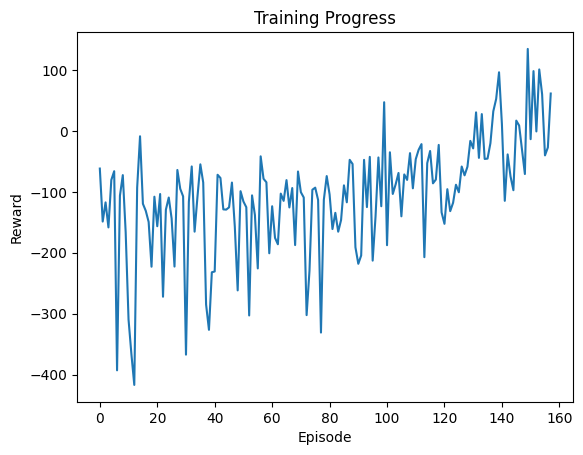

In [8]:
import matplotlib.pyplot as plt

# Now the rewards are stored in reward_callback.rewards
rewards = reward_callback.rewards

# Plotting
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Progress')
plt.show()